# Import Package

In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from joblib import dump, load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Read Dataset

In [144]:
df = pd.read_csv("../dataset/housePriceTehran.csv")
df = df.drop("Price(USD)",axis=1)
df = df.drop("Address",axis=1)
df["Parking"] = df["Parking"].astype(int)
df["Elevator"] = df["Elevator"].astype(int)
df["Warehouse"] = df["Warehouse"].astype(int)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Price
0,63,1,1,1,1,1.850000e+09
1,60,1,1,1,1,1.850000e+09
2,79,2,1,1,1,5.500000e+08
3,95,2,1,1,1,9.025000e+08
4,123,2,1,1,1,7.000000e+09


# Variable value

In [145]:
x = df.drop("Price",axis=1)
y = df["Price"]

# Convert to array

In [146]:
x = np.array(x)
y = np.array(y)

# Normalize data

In [147]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split Train and Test

In [148]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.1)

# Draw Plot

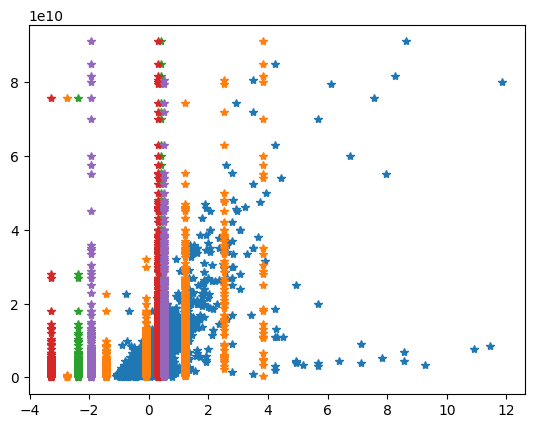

In [149]:
plt.plot(x_train,y_train,"*")

# RandomForestRegressor

In [150]:
model = RandomForestRegressor(n_estimators=110)
model.fit(x_train,y_train)


RandomForestRegressor(n_estimators=110)

# Predict

In [151]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Accuracy

In [152]:
score = r2_score(y_train,y_pred_train)
print("The accuracy of our model is {}%".format(round(score, 2) *100))
score_2 = r2_score(y_test,y_pred_test)
print("The accuracy of our model is {}%".format(round(score_2, 2) *100))

The accuracy of our model is 86.0%
The accuracy of our model is 74.0%


# Save And Load Model

In [153]:
dump(model, "../model/randomForsetHouseTehran.joblib.joblib") 
# model = load("../model/randomForsetHouseTehran.joblib.joblib")